# Modelisation of Demand /countrie 

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

1. Formula of demand 


In [11]:

T_{pop} (t) = \sum w (x,y) T_{2m} (x,y,t)

Demand(t) = (\alpha_1 + \beta_1T_{pop}(t))(1-F(t)) + (\alpha_2 + \beta_2T_{pop}(t))F(t)

F(t) = (1 + \exp[-\zeta(T_{2m}(t) - c)])^{-1}


with parameters:
- \alpha_1 = 371 GW
- \beta_1 = -4.17 GW/°C
- \alpha_2 = 283 GW
- \beta_2 = 0.83 GW/°C
- \zeta = 0.52 1/°C
- c = 11.17 °C

SyntaxError: invalid syntax (3766445953.py, line 1)

In [3]:
# Charger les fichiers
path_temp = r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA_0010.nc"  # Températures
temperature = xr.open_dataset(path_temp)

In [12]:
import xarray as xr
import numpy as np
import pandas as pd

# Parameters for energy demand model
alpha_1, beta_1 = 371, -4.17  # GW and GW/°C
alpha_2, beta_2 = 283, 0.83   # GW and GW/°C
zeta, c = 0.52, 11.17         # 1/°C and °C


# Compute the weighted temperature per grid point 
temperature = (temp_data["TSA"]*pop_data).sum()

# Compute F(t, x, y)
F = 1 / (1 + np.exp(-zeta * (temp - c)))

# Compute demand per grid point
demand_grid = ((alpha_1 + beta_1 * temp) * (1 - F) +
               (alpha_2 + beta_2 * temp) * F)

# Save demand per grid point to a NetCDF file
demand_grid.to_netcdf("energy_demand_per_grid.nc")

# Ensure demand_grid has valid dimensions before converting to DataFrame
if len(demand_grid.dims) > 0:
    df = demand_grid.to_dataframe().reset_index()
else:
    df = pd.DataFrame(demand_grid.to_array().values, columns=["demand"])
display(df)


# # Compute demand per country
# countries = [var for var in masks.variables if var.endswith("_mask")]
# country_demand = {}

# for country in countries:
#     mask = masks[country]
#     # Multiply demand by mask and population density, then sum
#     demand_country = (demand_grid * mask).sum(dim=["lat", "lon"])
#     country_name = country.replace("_mask", "")
#     country_demand[country_name] = demand_country

# # Convert results to DataFrame
# country_demand_df = pd.DataFrame({country: country_demand[country].values for country in country_demand})
# country_demand_df.index = temp_data["time"].values  # Use time as the index

# # Save country-level demand to CSV
# country_demand_df.to_csv("energy_demand_per_country.csv")

# print("Energy demand per grid saved to 'energy_demand_per_grid.nc'")
# print("Energy demand per country saved to 'energy_demand_per_country.csv'")


,demand
0,370.736603


Valeur minimale : nan
Valeur maximale : nan
Valeurs uniques : [nan]
Nombre de NaN : <xarray.DataArray 'demand' ()> Size: 8B
array(36500)
Coordinates:
    lat      float32 4B 48.53
    lon      float32 4B 2.5
Dates non convertibles : DatetimeIndex(['NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT',
               ...
               'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT', 'NaT',
               'NaT'],
              dtype='datetime64[ns]', length=36500, freq=None)
Coordonnées exactes sélectionnées : 48.53403 2.5


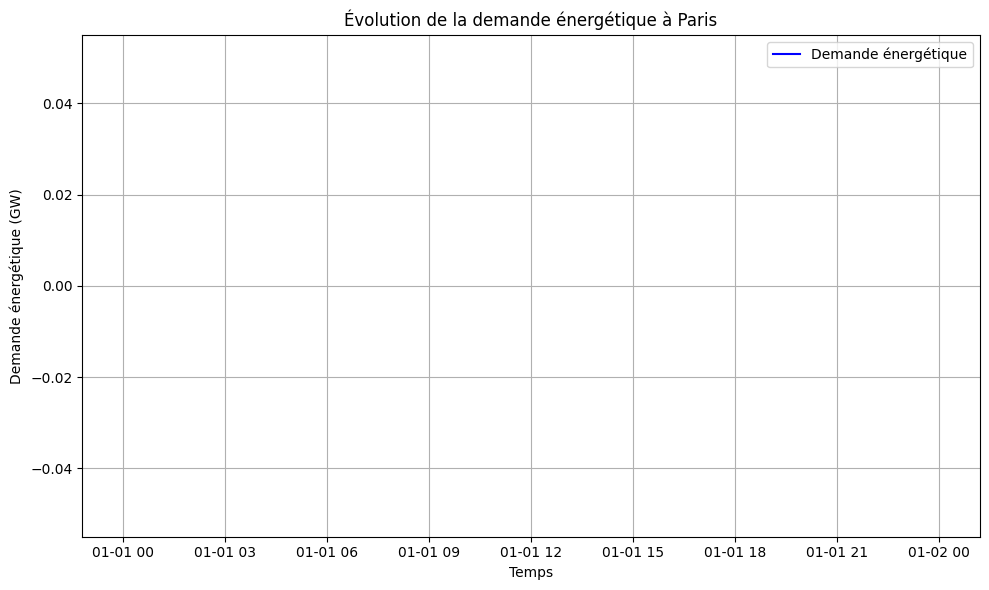

In [17]:

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Charger le fichier NetCDF
demand_ds = xr.open_dataset(r"C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\demand_per_grid_point.nc")

# Coordonnées de Paris (latitude, longitude)
lat_paris = 48.8566
lon_paris = 2.3522

# Sélectionner le grid point le plus proche de Paris
demand_paris = demand_ds['demand'].sel(lat=lat_paris, lon=lon_paris, method="nearest")

# Vérification des données extraites
print("Valeur minimale :", demand_paris.min().values)
print("Valeur maximale :", demand_paris.max().values)
print("Valeurs uniques :", np.unique(demand_paris.values))
print("Nombre de NaN :", np.isnan(demand_paris).sum())

# Convertir les dates pour Matplotlib
time_values = pd.to_datetime(demand_paris['time'].values, format="%Y-%m-%d", errors='coerce')

# Vérifier si certaines dates ne sont pas convertibles
print("Dates non convertibles :", time_values[time_values.isna()])

# Vérifier les coordonnées exactes du point sélectionné
print("Coordonnées exactes sélectionnées :", demand_paris['lat'].values, demand_paris['lon'].values)

# Tracer si les données sont valides
plt.figure(figsize=(10, 6))
plt.plot(time_values, demand_paris.values, label='Demande énergétique', color='blue')
plt.title('Évolution de la demande énergétique à Paris')
plt.xlabel('Temps')
plt.ylabel('Demande énergétique (GW)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Fermer le fichier après utilisation
demand_ds.close()


In [ ]:
import xarray as xr
import numpy as np
import pandas as pd

# Constants
alpha_1 = 371
beta_1 = -4.17
alpha_2 = 283
beta_2 = 0.83
zeta = 0.52
c = 11.17

# Ouvrir les fichiers de température et densité
temperature_file = r'C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\DEMAND\TSA_0010.nc'  # Remplacer avec votre chemin
density_file = r'C:\Users\flore\OneDrive\Documents\annee3bx\theselol\analyse\data\region_mask\pop_per_grid_point.nc'  # Remplacer avec votre chemin

# Charger les fichiers NetCDF
temperature_data = xr.open_dataset(temperature_file)
density_data = xr.open_dataset(density_file)
var = "Population Density, v4.11 (2000, 2005, 2010, 2015, 2020): 30 arc-minutes"

# Supposons que les deux fichiers contiennent des dimensions : temps x latitude x longitude
latitudes = temperature_data['lat']
longitudes = temperature_data['lon']
temperatures = temperature_data['TSA']
densities = density_data[var]  # Densité ou poids par point de grille

# Vérification des dimensions pour l'interpolation
print(f"Dimensions de la température : {temperatures.shape}")
print(f"Dimensions de la densité : {densities.shape}")

# Étape 1: Interpoler les densités pour qu'elles correspondent à la grille de température
# Vérifier si l'interpolation est nécessaire
if latitudes.shape != densities.shape[-2:] or longitudes.shape != densities.shape[-1:]:
    print("Interpolation nécessaire")
    densities_interp = densities.interp(lat=temperatures['lat'], lon=temperatures['lon'], method='linear')
else:
    densities_interp = densities
    print("Interpolation non nécessaire")

# Calcul de la température pondérée par point de grille
temp_in_C = temperatures - 273.15  # Conversion en degrés Celsius 
T_pop = (temp_in_C * densities_interp).sum(dim=['lat', 'lon'])

# Vérification de la température pondérée
print(f"T_pop : {T_pop}")

# Étape 2: Calculer F(t) pour chaque point de grille et chaque instant
F_t = 1 / (1 + np.exp(-zeta * (T_pop - c)))  # Fonction sigmoïde

# Étape 3: Calculer la demande en fonction de T_pop et F(t)
demand = (alpha_1 + beta_1 * T_pop) * (1 - F_t) + (alpha_2 + beta_2 * T_pop) * F_t
print(f"Demande : {demand}")

# Étape 4: Sauvegarder les résultats dans un fichier NetCDF
output_files = 'tpop_demand.nc'
T_pop.to_netcdf(output_files)

# Étape 5: Exporter vers un fichier Excel
# Aplatir la grille pour avoir les coordonnées latitudes, longitudes et la demande
grid_coordinates = np.array(np.meshgrid(latitudes, longitudes)).T.reshape(-1, 2)

# Ensure demand has the same length as grid_coordinates
if T_pop.size == grid_coordinates.shape[0]:
    T_pop_values = T_pop.values.flatten()
else:
    T_pop_values = np.zeros(grid_coordinates.shape[0])  # Placeholder for empty demand

# Créer un DataFrame
df = pd.DataFrame(grid_coordinates, columns=['Latitude', 'Longitude'])
df['T_pop'] = T_pop_values

# Sauvegarder dans un fichier Excel
excel_output = 'T_pop_data3.xlsx'
df.to_excel(excel_output, index=False)

# Maintenant, vous avez la demande dans un fichier NetCDF et un fichier Excel.




TypeError: 'DataArray' object is not callable